In [1]:
import os, yaml, sys
import numpy as np
import matplotlib.pyplot as plt

ENV = os.getenv("MY_ENV", "dev")
with open("../../config.yaml", "r") as f:
    config = yaml.safe_load(f)
paths = config[ENV]["paths"]
sys.path.append(paths["src_path"])

In [47]:
# create and plot 3 Gaussians with same sd, means shifted by 10, and decreasing peak heights

x = np.linspace(-50, 50, 2000)            # x axis covering the shifted means
sigma = 4.0                               # same standard deviation for all
means = [10, 20, 30]                       # means shifted by 10
heights = np.linspace(0.4, 1, 3)        # increasingly shorter heights: 1.0, 0.7, 0.4

gaussians = []
for mu, H in zip(means, heights):
    g = H * np.exp(-0.5 * ((x - mu) / sigma) ** 2)   # peak set by H
    gaussians.append(g)



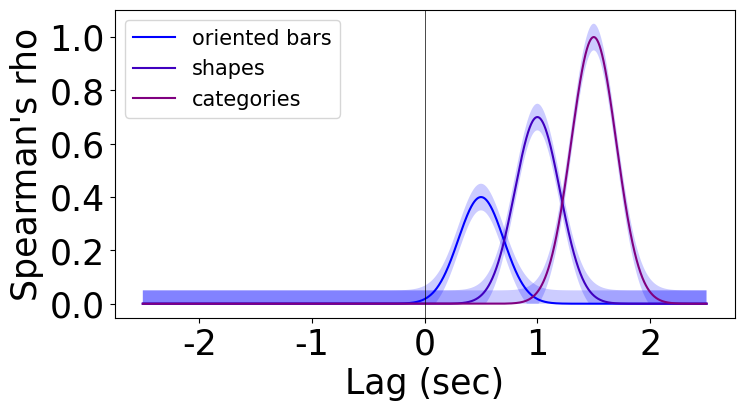

In [48]:
labels = ["oriented bars", "shapes", "categories"]
tick_labels = [-2, -1, 0, 1, 2]
plt.figure(figsize=(8, 4))
err = 0.05
for i, g in enumerate(gaussians):
    try:
        n = len(gaussians)
    except NameError:
        n = 1
    lower = np.clip(g - err, 0, None)
    t = i / (n - 1) if n > 1 else 0.0
    blue = np.array([0.5, 0.7, 1.0])  # lighter blue
    purple = np.array([0.5, 0.0, 0.5])
    color = tuple((1 - t) * blue + t * purple)
    try:
        fill_colors.append(color)
    except NameError:
        fill_colors = [color]
    plt.gca().set_prop_cycle(color=fill_colors)
    upper = g + err
    plt.fill_between(x, lower, upper, alpha=0.2)
for i, g in enumerate(gaussians):
    plt.plot(x, g, label=f"{labels[i]}")
ticks = np.arange(-40, -40 + 20 * len(tick_labels), 20)
plt.xticks(ticks, tick_labels, fontsize=25)
plt.yticks(fontsize=25)
plt.axvline(0, color="black", linewidth=.5)
plt.xlabel("Lag (sec)", fontsize=25)
plt.ylabel("Spearman's rho", fontsize=25)
plt.legend(fontsize=15)

plt.show()